## Question 6: Clustering ( K- Means )

Clustering involves the grouping of similar objects into a set known as cluster. Objects in one cluster are likely to be different when compared to objects grouped under another cluster. Clustering is one of the main tasks in exploratory data mining and is also a technique used in statistical data analysis.\

Eg: k-means, hierarchical, partitioning, density-based and model-based. 

### Importing the required libraries

In [186]:
import os
import re
import string

#common libraries
import numpy as np
import pandas as pd

#To compute euclidean distance
from scipy.spatial import distance

#for calculating the metrics
from sklearn.metrics import accuracy_score

#for feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Reading the data from the files

Reading the 1725 files from the dataset and make a dataframe whose each row will contain the data of the file.

In [187]:
filenames = os.listdir('/home/shubham/SMAI/Assignment2/Assignment-2_Dataset/Datasets/Question-6/assignment2_q6')
original_clusters=[[],[],[],[],[],[]]
actual_labels=[]
list_files=[]
for filename in filenames:
    temp1=filename.split('.')[0].split('_')
    #print(temp1)
    index=int(temp1[1])
    num=int(temp1[0])
    original_clusters[index].append(num)
    actual_labels.append(index)
    list_files.append(filename)
    
for i in range(1,6):
    print('cluster ',i,'-',len(original_clusters[i]))

# for i in range(len(actual_labels)):    
#     print(list_files[i],actual_labels[i])

cluster  1 - 410
cluster  2 - 286
cluster  3 - 317
cluster  4 - 411
cluster  5 - 301
371_1.txt 1
38_1.txt 1
242_2.txt 2
308_1.txt 1
102_1.txt 1
179_1.txt 1
69_3.txt 3
171_3.txt 3
229_5.txt 5
255_4.txt 4
285_1.txt 1
365_1.txt 1
183_3.txt 3
38_3.txt 3
62_1.txt 1
117_1.txt 1
42_5.txt 5
249_4.txt 4
237_3.txt 3
33_2.txt 2
109_1.txt 1
86_1.txt 1
152_4.txt 4
275_3.txt 3
16_3.txt 3
231_3.txt 3
45_4.txt 4
28_1.txt 1
158_5.txt 5
225_1.txt 1
269_5.txt 5
255_1.txt 1
64_3.txt 3
58_3.txt 3
89_1.txt 1
127_2.txt 2
136_2.txt 2
34_4.txt 4
104_3.txt 3
249_3.txt 3
143_3.txt 3
161_5.txt 5
286_3.txt 3
50_1.txt 1
65_1.txt 1
276_5.txt 5
118_5.txt 5
148_5.txt 5
266_3.txt 3
321_1.txt 1
40_4.txt 4
213_2.txt 2
230_1.txt 1
161_4.txt 4
72_5.txt 5
173_3.txt 3
93_5.txt 5
220_3.txt 3
82_2.txt 2
130_4.txt 4
248_1.txt 1
116_4.txt 4
198_4.txt 4
321_4.txt 4
204_2.txt 2
106_4.txt 4
160_2.txt 2
162_1.txt 1
141_2.txt 2
188_3.txt 3
34_5.txt 5
122_3.txt 3
310_4.txt 4
51_1.txt 1
9_3.txt 3
217_3.txt 3
74_2.txt 2
174_1.txt 1
15_4

173_5.txt 5
278_1.txt 1
77_2.txt 2
19_4.txt 4
17_4.txt 4
52_3.txt 3
155_4.txt 4
109_5.txt 5
53_3.txt 3
19_5.txt 5
40_3.txt 3
94_5.txt 5
90_3.txt 3
320_4.txt 4
76_5.txt 5
98_5.txt 5
263_3.txt 3
52_5.txt 5
227_1.txt 1
296_3.txt 3
13_2.txt 2
83_4.txt 4
376_4.txt 4
277_1.txt 1
190_3.txt 3
265_1.txt 1
199_3.txt 3
168_3.txt 3
166_3.txt 3
343_1.txt 1
164_5.txt 5
316_4.txt 4
249_5.txt 5
379_4.txt 4
218_5.txt 5
49_4.txt 4
359_1.txt 1
262_3.txt 3
53_1.txt 1
29_2.txt 2
274_4.txt 4
137_4.txt 4
175_2.txt 2
238_2.txt 2
123_3.txt 3
20_1.txt 1
96_2.txt 2
132_2.txt 2
164_3.txt 3
49_5.txt 5
281_1.txt 1
135_3.txt 3
100_3.txt 3
314_4.txt 4
134_1.txt 1
270_5.txt 5
331_4.txt 4
144_5.txt 5
259_1.txt 1
57_3.txt 3
322_1.txt 1
261_5.txt 5
93_1.txt 1
74_1.txt 1
143_4.txt 4
174_2.txt 2
181_2.txt 2
183_1.txt 1
23_1.txt 1
193_2.txt 2
186_5.txt 5
127_5.txt 5
130_2.txt 2
73_5.txt 5
75_4.txt 4
178_1.txt 1
123_5.txt 5
273_1.txt 1
162_2.txt 2
71_3.txt 3
226_2.txt 2
255_2.txt 2
267_3.txt 3
257_2.txt 2
46_1.txt 1
366_1.tx

Making the dataset

In [191]:
data = []
path = '/home/shubham/SMAI/Assignment2/Assignment-2_Dataset/Datasets/Question-6/assignment2_q6'
files = os.listdir(path)

for f in files:
    fn=path+"/"+f
    temp1=f.split('.')[0].split('_')
    #print(temp1)
    index=int(temp1[1])
    num=int(temp1[0])
    with open (fn, "rb") as myfile:
        data.append(myfile.read())
        
df = pd.DataFrame(data)
df

,0
0,b'Q&A: Malcolm Glazer and Man Utd\n\nThe battl...
1,b'BA to suspend two Saudi services\n\nBritish ...
2,b'Rapper Jay-Z becomes label boss\n\nRap star ...
3,b'US gives foreign firms extra time\n\nForeign...
4,b'Italy to get economic action plan\n\nItalian...
...,...
1720,b'McIlroy wins 800m indoor title\n\nJames McIl...
1721,b'Web logs aid disaster recovery\n\nSome of th...
1722,"b""Parmalat boasts doubled profits\n\nParmalat,..."
1723,b'Chepkemei joins Edinburgh line-up\n\nSusan C...


### Processing the data

#### 1. Decoding from bytes to string

In [201]:
def to_decode(df,i):
    return df[0][i].decode("utf-8",errors="ignore")

#### 2. Replace newline with space

In [193]:
def to_replace_newline(line):
    return line.replace('\n',' ')

#### 3. To remove punctuation symbols

In [194]:
def remove_punctuation(line):
    return line.translate(str.maketrans('', '', string.punctuation))

#### 4. To remove extra white spaces

In [195]:
def remove_spaces(line):
    return " ".join(line.split(' '))

#### 5. To remove Numbers

In [196]:
def remove_numbers(line):
    return re.sub(r'\d+', '', line)

#### 6. Stemming

Stemming is the process of producing morphological variants of a root/base word.

like work, works , worked, working will be replaced the its root word work.

#### 7. Removing stop words and lowercase is done by TfidfVectorizer

In [202]:
#for stemming the data
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

### Now performing the preprocessing

In [203]:
listt=[]
for i in range(df.shape[0]):
    line=to_decode(df,i) #decoding from bytes to string
    line=to_replace_newline(line)   #replace newline with space
    line=remove_punctuation(line) #remove punctuation
    line=remove_spaces(line)    #remove extra spaces
    line=line.replace('\s',' ')
    line = remove_numbers(line) #remove digits
    line=stemSentence(line)  #stemming
    listt.append(line)


In [204]:
listt

['QA malcolm glazer and man utd the battl for control of manchest unit ha taken anoth turn after the club confirm it had receiv a fresh takeov approach from US busi tycoon malcolm glazer No formal offer ha been made yet but manchest unit have confirm they have receiv a detail propos from the US entrepreneur which could lead to a bid report have put the offer at p per share which would valu manchest unit at about £m bn the approach by the yearold owner of the tampa bay buccan american footbal team is reportedli be led by hi two son avi and joel A previou approach to the unit board by Mr glazer in octob last year wa turn down howev the bbc ha learnt that the club is unlik to reject the latest plan out of hand Mr glazer previou offer involv borrow larg amount of money to financ ani takeov that would have left the club with debt level which were deem not in the best interest of the compani by manchest unit board when they reject hi approach last year howev Mr glazer latest offer is report 

## TfIdfVectorizer

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

Term Frequency :

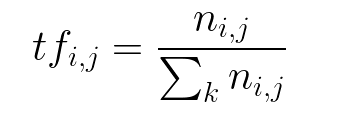


Inverse Data Frequency (IDF):
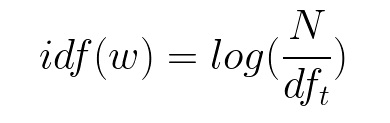

Tf-Idf:
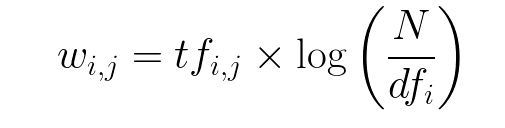

In [150]:
word_vectorizer = TfidfVectorizer(stop_words='english',lowercase='True')

In [151]:
word_vectorizer.fit(listt)
df_X_train_word_features = word_vectorizer.transform(listt)
df_vectors = df_X_train_word_features.toarray()
vocabulary = word_vectorizer.get_feature_names()
#print(vocabulary)
print(len(vocabulary))

19219


In [152]:
df_vectors.shape

(1725, 19219)

### Taking the initial centers randomly

In [174]:
n=5
index = np.random.choice(df_vectors.shape[0], n, replace=False) 
print(index)
#index=[118,784,1338,1516,1151]
# centers=df_vectors[index]
# print(centers)
centers=df_vectors[index]
# centers=np.random.rand(5,len(df_vectors[0]))*np.std(df_vectors)
print(centers)
clusters=[]
predicted_labels=[]

#[ 118  784 1338 1516 1151]

[ 162  347  674 1373  554]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### For Clustering using K-Means algorithm:

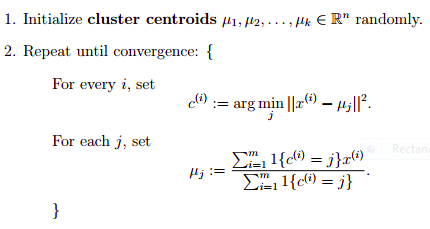

### Implementation

In [175]:
for itr in range(30):
    clusters=[[],[],[],[],[]]
    predicted_labels=[]
    for i in range(df_vectors.shape[0]):
        dist=[]
        for j in range(5):
            d = distance.euclidean(df_vectors[i], centers[j])
            dist.append(d)
        
        predicted_labels.append((np.argmin(dist,axis=0)))
        clusters[(np.argmin(dist,axis=0))].append(df_vectors[i])
        
    
#     print(clusters)
   # print(centers)
    for i in range(5):
#          print(clusters[i])
         centers[i]=np.mean(clusters[i],axis=0)
         #print(centers[i])
    print(itr," : ")
    for i in range(5):
        print(len(clusters[i]),end=' ')
#     for i in range(5):
#         print(len(predicted_labels[i]),end=' ')
        
    print()

0  : 
375 261 327 274 488 
1  : 
439 201 267 364 454 
2  : 
487 205 267 408 358 
3  : 
521 216 266 415 307 
4  : 
531 231 265 416 282 
5  : 
539 243 265 417 261 
6  : 
536 263 264 417 245 
7  : 
535 275 263 418 234 
8  : 
540 280 263 419 223 
9  : 
544 283 262 417 219 
10  : 
546 283 261 416 219 
11  : 
546 283 261 416 219 
12  : 
546 283 261 416 219 
13  : 
546 283 261 416 219 
14  : 
546 283 261 416 219 
15  : 
546 283 261 416 219 
16  : 
546 283 261 416 219 
17  : 
546 283 261 416 219 
18  : 
546 283 261 416 219 
19  : 
546 283 261 416 219 
20  : 
546 283 261 416 219 
21  : 
546 283 261 416 219 
22  : 
546 283 261 416 219 
23  : 
546 283 261 416 219 
24  : 
546 283 261 416 219 
25  : 
546 283 261 416 219 
26  : 
546 283 261 416 219 
27  : 
546 283 261 416 219 
28  : 
546 283 261 416 219 
29  : 
546 283 261 416 219 


In [184]:
mapping={}
for i in range(len(predicted_labels)):
    mapping[list_files[i]]=predicted_labels[i]
    
mapping

{'371_1.txt': 0,
 '38_1.txt': 0,
 '242_2.txt': 2,
 '308_1.txt': 0,
 '102_1.txt': 0,
 '179_1.txt': 0,
 '69_3.txt': 4,
 '171_3.txt': 0,
 '229_5.txt': 1,
 '255_4.txt': 3,
 '285_1.txt': 0,
 '365_1.txt': 0,
 '183_3.txt': 4,
 '38_3.txt': 4,
 '62_1.txt': 0,
 '117_1.txt': 0,
 '42_5.txt': 1,
 '249_4.txt': 3,
 '237_3.txt': 0,
 '33_2.txt': 2,
 '109_1.txt': 0,
 '86_1.txt': 0,
 '152_4.txt': 3,
 '275_3.txt': 4,
 '16_3.txt': 4,
 '231_3.txt': 0,
 '45_4.txt': 3,
 '28_1.txt': 0,
 '158_5.txt': 1,
 '225_1.txt': 0,
 '269_5.txt': 1,
 '255_1.txt': 0,
 '64_3.txt': 0,
 '58_3.txt': 4,
 '89_1.txt': 0,
 '127_2.txt': 2,
 '136_2.txt': 2,
 '34_4.txt': 3,
 '104_3.txt': 1,
 '249_3.txt': 4,
 '143_3.txt': 0,
 '161_5.txt': 1,
 '286_3.txt': 4,
 '50_1.txt': 1,
 '65_1.txt': 0,
 '276_5.txt': 1,
 '118_5.txt': 1,
 '148_5.txt': 1,
 '266_3.txt': 4,
 '321_1.txt': 0,
 '40_4.txt': 3,
 '213_2.txt': 2,
 '230_1.txt': 0,
 '161_4.txt': 3,
 '72_5.txt': 2,
 '173_3.txt': 4,
 '93_5.txt': 0,
 '220_3.txt': 4,
 '82_2.txt': 2,
 '130_4.txt': 3,


### Calculating the Homogeneity score

This score is useful to check whether the clustering algorithm meets an important requirement: a cluster should contain only samples belonging to a single class. It's defined as:

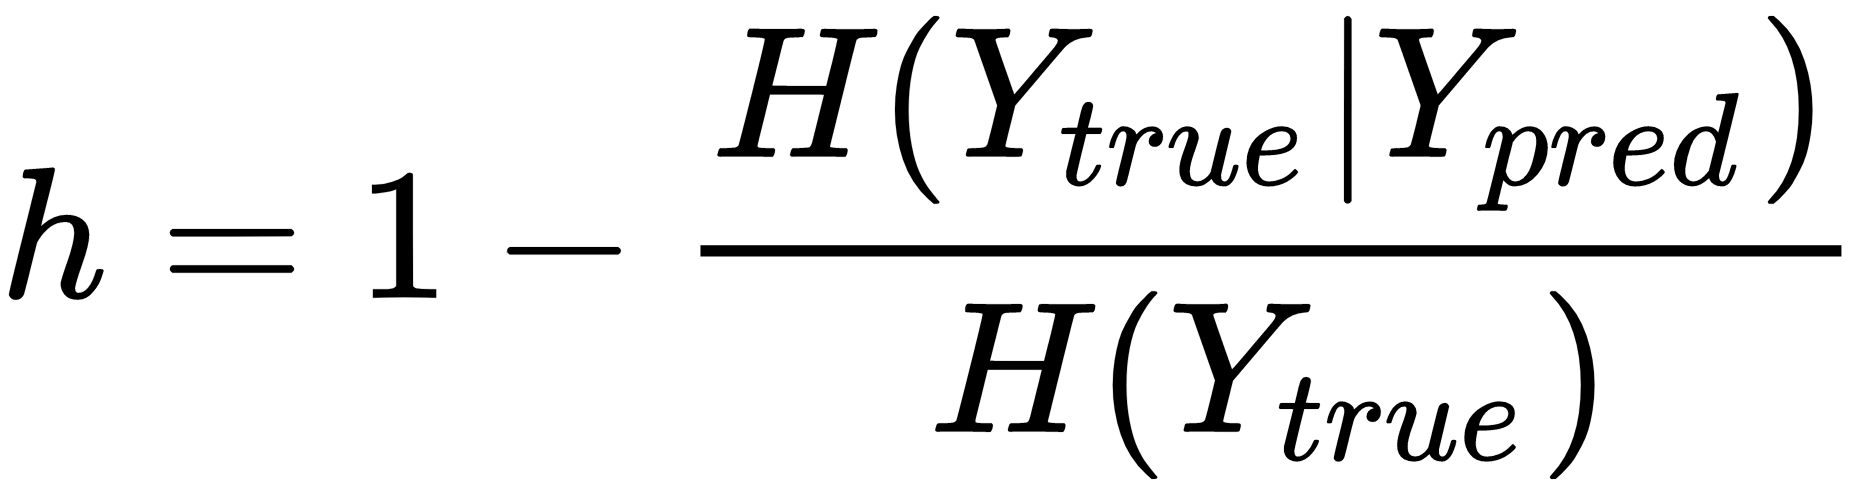

It's bounded between 0 and 1, with low values indicating a low homogeneity. In fact, when the knowledge of Ypred reduces the uncertainty of Ytrue, H(Ytrue|Ypred) becomes smaller (h → 1) and viceversa. For our example, the homogeneity score can be computed as:



In [177]:
from sklearn.metrics.cluster import homogeneity_score
# print(predicted_labels)
# print(labels)
homogeneity_score(actual_labels,predicted_labels)

0.7705835793000699